The purpose of this report is to develop a machine learning model for Zyfra that can predict the amount of gold recovered from gold ore. Throughout this report the datasets will be evaluated and preprocessed in order to test multiple machine learning models and find the most efficient model according to the sMAPE scoring method.

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
import statistics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
#Load all data
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
gold_recovery_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
gold_recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [7]:
gold_recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [9]:
gold_recovery_full.duplicated().sum()/gold_recovery_full.shape[0]

0.0

In [10]:
gold_recovery_train.duplicated().sum()/gold_recovery_train.shape[0]

0.0

In [11]:
gold_recovery_test.duplicated().sum()/gold_recovery_test.shape[0]

0.0

There are no duplicate columns in the provided datasets. The full dataset and the training dataset each have 87 columns while the test dataset has 53 columns. The difference in these columns will be analyzed later in this report. All columns have correct datatypes.

In [12]:
def recovery(df, C, F, T):
    rec = ((df[C] * (df[F] - df[T])) / (df[F] * (df[C] - df[T]))) * 100
    return rec

vals_pred = recovery(gold_recovery_train.dropna(subset=['rougher.output.recovery']),
                    'rougher.output.concentrate_au',
                    'rougher.input.feed_au',
                    'rougher.output.tail_au')

vals_act = gold_recovery_train['rougher.output.recovery'].dropna().to_list()

print('Mean Absolute Error:', mean_absolute_error(vals_act, vals_pred))

Mean Absolute Error: 9.303415616264301e-15


The NaN's were removed before carrying out this calculation. The MAE is so small in this instance that it is negligible. The values in both columns are virtually the same.

In [13]:
test_columns = list(gold_recovery_test.columns.values)
full_columns = list(gold_recovery_full.columns.values)
list(set(full_columns)-set(test_columns))

['final.output.concentrate_au',
 'rougher.output.recovery',
 'final.output.tail_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.tail_sol',
 'final.output.concentrate_pb',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.tail_pb',
 'primary_cleaner.output.concentrate_ag',
 'final.output.recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.tail_pb',
 'final.output.tail_ag',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'secondary_cleaner.output.tail_ag',
 'rougher.output.concentrate_sol',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'final.output.concentrate_ag',
 'final.output.tail_au',
 'secondary_cleaner.output.tail_pb',
 'rougher.output.tail_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'final.output.tail_pb',
 'rougher.output.tail_ag',
 'secondary_c

All of the output and ratio calculation columns are removed from the test group.

In [14]:
df_comp_au = gold_recovery_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
df_comp_au_mean = df_comp_au.mean(axis=0)
df_comp_au_mean

rougher.input.feed_au                     7.565838
rougher.output.concentrate_au            17.879538
primary_cleaner.output.concentrate_au    29.212289
final.output.concentrate_au              40.001172
dtype: float64

In [15]:
df_comp_ag = gold_recovery_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
df_comp_ag_mean = df_comp_ag.mean(axis=0)
df_comp_ag_mean

rougher.input.feed_ag                     8.065715
rougher.output.concentrate_ag            10.874484
primary_cleaner.output.concentrate_ag     7.691652
final.output.concentrate_ag               4.781559
dtype: float64

In [16]:
df_comp_pb = gold_recovery_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]
df_comp_pb_mean = df_comp_pb.mean(axis=0)
df_comp_pb_mean

rougher.input.feed_pb                    3.305676
rougher.output.concentrate_pb            6.900646
primary_cleaner.output.concentrate_pb    8.921110
final.output.concentrate_pb              9.095308
dtype: float64

In [17]:
df_comp_pb_mean = df_comp_pb_mean.to_list()
df_comp_au_mean = df_comp_au_mean.to_list()
df_comp_ag_mean = df_comp_ag_mean.to_list()
index =['rougher_input_feed', 'rougher_output_conc', 'primary_cleaner_output_conc', 'final_output_conc']

In [18]:
df_comp_pb_mean

[3.3056758107348885, 6.900646225251443, 8.921109840609049, 9.095308105450266]

In [19]:
df_comp_au_mean

[7.565837755623329, 17.879538203033487, 29.2122887022116, 40.001171896007136]

In [20]:
df_comp_ag_mean

[8.065715344767641, 10.874483745395448, 7.691651764297089, 4.781559451695084]

In [21]:
dictionary = {'pb': df_comp_pb_mean, 'au': df_comp_au_mean, 'ag': df_comp_ag_mean}

In [22]:
df_conc = pd.DataFrame(list(zip(df_comp_pb_mean, df_comp_au_mean, df_comp_ag_mean)),index= index, columns=['pb', 'au', 'ag'])
df_conc

,pb,au,ag
rougher_input_feed,3.305676,7.565838,8.065715
rougher_output_conc,6.900646,17.879538,10.874484
primary_cleaner_output_conc,8.921110,29.212289,7.691652
final_output_conc,9.095308,40.001172,4.781559


<AxesSubplot:>

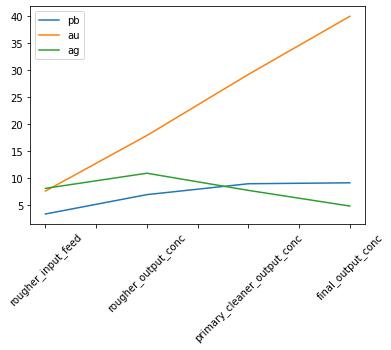

In [23]:
df_conc.plot(kind='line', rot=45)

The concentration of gold steadily increases throughout the whole process. The concentration of silver increases from the rougher.input.feed step to the rougher.output.concentrate step but then decreases for steps. Lead concentration increases slightly from the beginning to the end of the process.

In [24]:
size_train = gold_recovery_train['rougher.input.feed_size']
size_test = gold_recovery_test['rougher.input.feed_size']

AB_difference = (size_test.mean() - size_train.mean())
alpha = 0.05# <write the significance level here>
    
state = np.random.RandomState(12345)

bootstrap_samples = 1000
count = 0
for i in range(bootstrap_samples):
    # concatenate samples
    united_samples = pd.concat([size_train, size_test])# < write code here >

    # create subsample
    subsample = united_samples.sample(frac=1, replace=True, random_state=state)# < write code here >
    
    # split subsample in half
    subsample_A = subsample[:len(size_train)]# < write code here >
    subsample_B = subsample[len(size_train):]# < write code here >

    # find the difference between the means
    bootstrap_difference = (subsample_B.mean() - subsample_A.mean())# < write code here >
    
    # if the difference is not less than actual difference, add "1" to the counter
    if bootstrap_difference >= AB_difference:
        count += 1

# p-value is equal to the percentage of excess values
pvalue = 1. * count / bootstrap_samples
print('p-value =', pvalue)

if pvalue < alpha:
    print("Reject null hypothesis: values vary signifcantly, model evaluation will be incorrect.")
else:
    print("Failed to reject null hypothesis: values do not vary signifcantly, model evaluation will be correct.")

p-value = 1.0
Failed to reject null hypothesis: values do not vary signifcantly, model evaluation will be correct.


There are many datapoints where several  concentrations go down to 0. It is unlikely that concentrations would suddenly decrease all the way to 0 without any traces of any substance. These 0's most likely signify datapoints where data is missing. These datapoints will be interpolated.

In [25]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [26]:
gold_recovery_full_date = gold_recovery_full['date']
gold_recovery_full = gold_recovery_full.drop(['date'], axis=1)
gold_recovery_full = gold_recovery_full.interpolate(axis=1, limit_area='inside')
gold_recovery_full = gold_recovery_full.merge(gold_recovery_full_date, how='left', right_index=True, left_index=True)

In [27]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22630 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               22630 non-null  float64
 5   final.output.tail_ag                                22635 non-null  float64
 6   final.output.tail_pb                                22635 non-null  float64
 7   final.output.tail_sol                               22635 non-null  float64
 8   final.output.tail_au                                22635 non-null  float64


In [28]:
gold_recovery_full_date

0        2016-01-15 00:00:00
1        2016-01-15 01:00:00
2        2016-01-15 02:00:00
3        2016-01-15 03:00:00
4        2016-01-15 04:00:00
                ...         
22711    2018-08-18 06:59:59
22712    2018-08-18 07:59:59
22713    2018-08-18 08:59:59
22714    2018-08-18 09:59:59
22715    2018-08-18 10:59:59
Name: date, Length: 22716, dtype: object

In [29]:
gold_recovery_full = gold_recovery_full[(gold_recovery_full != 0).all(1)]
gold_recovery_full = gold_recovery_full.dropna()

In [30]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18686 entries, 0 to 22706
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         18686 non-null  float64
 1   final.output.concentrate_pb                         18686 non-null  float64
 2   final.output.concentrate_sol                        18686 non-null  float64
 3   final.output.concentrate_au                         18686 non-null  float64
 4   final.output.recovery                               18686 non-null  float64
 5   final.output.tail_ag                                18686 non-null  float64
 6   final.output.tail_pb                                18686 non-null  float64
 7   final.output.tail_sol                               18686 non-null  float64
 8   final.output.tail_au                                18686 non-null  float64


In [31]:
gold_recovery_test = gold_recovery_test[(gold_recovery_test != 0).all(1)]
gold_recovery_test = gold_recovery_test.dropna()

In [32]:
gold_recovery_train = gold_recovery_train[(gold_recovery_train != 0).all(1)]
gold_recovery_train = gold_recovery_train.dropna()

In [33]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10285 entries, 0 to 16845
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                10285 non-null  object 
 1   final.output.concentrate_ag                         10285 non-null  float64
 2   final.output.concentrate_pb                         10285 non-null  float64
 3   final.output.concentrate_sol                        10285 non-null  float64
 4   final.output.concentrate_au                         10285 non-null  float64
 5   final.output.recovery                               10285 non-null  float64
 6   final.output.tail_ag                                10285 non-null  float64
 7   final.output.tail_pb                                10285 non-null  float64
 8   final.output.tail_sol                               10285 non-null  float64


In [34]:
#Function to calculate sMAPE
def smape(target, predicted):
    return 1/len(target) * np.sum(np.abs(predicted-target) / ((np.abs(target) + np.abs(predicted))/2)*100)

In [35]:
features_train_original = gold_recovery_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_train_rougher = gold_recovery_train['rougher.output.recovery']
target_train_final = gold_recovery_train['final.output.recovery']

In [36]:
features_train_original = features_train_original.reset_index(drop=True)
target_train_rougher = target_train_rougher.reset_index(drop=True)
target_train_final = target_train_final.reset_index(drop=True)

In [37]:
#Test LinearRegression
scores_linear_rougher = []
scores_linear_final = []

for subtrain_index, valid_index in KFold(n_splits=3).split(features_train_original):
    x_train = features_train_original.loc[subtrain_index]
    x_valid =  features_train_original.loc[valid_index]
    y_train =  target_train_rougher.loc[subtrain_index]
    y_valid = target_train_rougher.loc[valid_index]
    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_valid)
    scores_linear_rougher.append(smape(y_valid, predictions_valid))

smape_rougher_linear = statistics.mean(scores_linear_rougher)

for subtrain_index, valid_index in KFold(n_splits=3).split(features_train_original):
    x_train = features_train_original.loc[subtrain_index]
    x_valid =  features_train_original.loc[valid_index]
    y_train =  target_train_final.loc[subtrain_index]
    y_valid = target_train_final.loc[valid_index]
    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_valid)
    scores_linear_final.append(smape(y_valid, predictions_valid))

smape_final_linear = statistics.mean(scores_linear_final)

f_smape_linear = 0.25 * smape_rougher_linear + 0.75 * smape_final_linear
f_smape_linear

3.3113638186260026

In [38]:
#Test RandomForestRegressor
scores_rfr_rougher = []
scores_rfr_final = []

for subtrain_index, valid_index in KFold(n_splits=3).split(features_train_original):
    x_train = features_train_original.loc[subtrain_index]
    x_valid =  features_train_original.loc[valid_index]
    y_train =  target_train_rougher.loc[subtrain_index]
    y_valid = target_train_rougher.loc[valid_index]
    model = RandomForestRegressor()
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_valid)
    scores_rfr_rougher.append(smape(y_valid, predictions_valid))

smape_rougher_rfr = statistics.mean(scores_rfr_rougher)

for subtrain_index, valid_index in KFold(n_splits=3).split(features_train_original):
    x_train = features_train_original.loc[subtrain_index]
    x_valid =  features_train_original.loc[valid_index]
    y_train =  target_train_final.loc[subtrain_index]
    y_valid = target_train_final.loc[valid_index]
    model = RandomForestRegressor()
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_valid)
    scores_rfr_final.append(smape(y_valid, predictions_valid))

smape_final_rfr = statistics.mean(scores_rfr_final)

f_smape_rfr = 0.25 * smape_rougher_rfr + 0.75 * smape_final_rfr
f_smape_rfr

1.9665056231495859

sMAPE scores are better the lower they are. Out of the models that were tested, RandomForestRegressor gave us the better score. This model will now be tested with the test dataset.

In [39]:
len(gold_recovery_full)

18686

In [40]:
len(gold_recovery_test)

5357

In [41]:
gold_recovery_full

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,date
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2016-01-15 00:00:00
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,2016-01-15 01:00:00
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,2016-01-15 02:00:00
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,2016-01-15 03:00:00
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,2016-01-15 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22702,3.599454,12.308172,6.512304,45.477834,59.871040,8.882691,3.036575,9.421421,1.826293,91.906045,...,-500.989518,20.005718,-500.154032,17.987716,-501.022243,13.020843,-500.218430,20.011456,-499.842173,2018-08-17 21:59:59
22703,3.540800,12.423927,6.702631,45.323979,70.477689,8.866079,2.816357,9.838458,1.439220,101.341013,...,-500.990672,20.023346,-500.147796,18.010037,-500.299851,12.982786,-500.097885,20.003557,-506.135132,2018-08-17 22:59:59
22704,3.573966,12.199649,6.584768,45.440494,74.594019,9.042359,2.980534,9.737694,1.455128,111.053703,...,-500.714430,20.058045,-499.066195,17.990312,-499.278862,13.002126,-499.724599,20.004410,-500.347623,2018-08-17 23:59:59
22705,3.525247,12.121578,6.605982,45.785582,75.185602,9.041052,3.208360,9.792629,1.534906,127.007820,...,-501.134671,19.984883,-501.051735,17.948892,-500.147451,13.009772,-500.081309,20.012084,-501.651764,2018-08-18 00:59:59


In [42]:
gold_recovery_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [43]:
gold_recovery_test_join = gold_recovery_test.merge(gold_recovery_full, how='left', on='date')
gold_recovery_test_join

,date,primary_cleaner.input.sulfate_x,primary_cleaner.input.depressant_x,primary_cleaner.input.feed_size_x,primary_cleaner.input.xanthate_x,primary_cleaner.state.floatbank8_a_air_x,primary_cleaner.state.floatbank8_a_level_x,primary_cleaner.state.floatbank8_b_air_x,primary_cleaner.state.floatbank8_b_level_x,primary_cleaner.state.floatbank8_c_air_x,...,secondary_cleaner.state.floatbank4_a_air_y,secondary_cleaner.state.floatbank4_a_level_y,secondary_cleaner.state.floatbank4_b_air_y,secondary_cleaner.state.floatbank4_b_level_y,secondary_cleaner.state.floatbank5_a_air_y,secondary_cleaner.state.floatbank5_a_level_y,secondary_cleaner.state.floatbank5_b_air_y,secondary_cleaner.state.floatbank5_b_level_y,secondary_cleaner.state.floatbank6_a_air_y,secondary_cleaner.state.floatbank6_a_level_y
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5353,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5354,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5355,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [44]:
gold_recovery_test_join = gold_recovery_test_join[(gold_recovery_test_join != 0).all(1)]
gold_recovery_test_join = gold_recovery_test_join.dropna()

In [45]:
features_train_test = gold_recovery_test_join.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_train_rougher_test = gold_recovery_test_join['rougher.output.recovery']
target_train_final_test = gold_recovery_test_join['final.output.recovery']

In [46]:
features_train_test = features_train_test.reset_index(drop=True)
target_train_rougher_test = target_train_rougher_test.reset_index(drop=True)
target_train_final_test = target_train_final_test.reset_index(drop=True)

In [47]:
#Test RandomForestRegressor on test dataset.
scores_rfr_rougher_test = []
scores_rfr_final_test = []

for subtrain_index, valid_index in KFold(n_splits=3).split(features_train_test):
    x_train = features_train_test.loc[subtrain_index]
    x_valid =  features_train_test.loc[valid_index]
    y_train =  target_train_rougher_test.loc[subtrain_index]
    y_valid = target_train_rougher_test.loc[valid_index]
    model = RandomForestRegressor()
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_valid)
    scores_rfr_rougher_test.append(smape(y_valid, predictions_valid))

smape_rougher_rfr_test = statistics.mean(scores_rfr_rougher_test)

for subtrain_index, valid_index in KFold(n_splits=3).split(features_train_test):
    x_train = features_train_test.loc[subtrain_index]
    x_valid =  features_train_test.loc[valid_index]
    y_train =  target_train_final_test.loc[subtrain_index]
    y_valid = target_train_final_test.loc[valid_index]
    model = RandomForestRegressor()
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_valid)
    scores_rfr_final_test.append(smape(y_valid, predictions_valid))

smape_final_rfr_test = statistics.mean(scores_rfr_final_test)

f_smape_rfr_test = 0.25 * smape_rougher_rfr_test + 0.75 * smape_final_rfr_test
f_smape_rfr_test

2.4228410346081732

sMAPE was used to calculate the quality of the RandomForestRegressor model on the test dataset. A score of 2.42 was returned which is a satisfactory score for this model. The RandomForestRegressor model will be used going forward to predict the amount of gold that can be recovered from gold ore.